# XGBoost para Regresión

Transformamos los datos en una matriz "xgb" para poder realizar el modelo.

# Para instalar el xgboost:

## En Google Colab no es necesario instalar nada
En un entorno local que use Anaconda, abrir Anaconda Prompt
```
anaconda search -t conda xgboost
conda install -c mndrake xgboost
```

Si la opcion anterior no funciona correctamente, existe la siguiente opcion:
```
conda install -c anaconda py-xgboost
```
Es normal que tarde un buen rato.

In [1]:
from xgboost import plot_importance
import xgboost as xgb

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Regresión/hormigon.csv")

In [4]:
descripcion = data.describe(include = "all").T
print(descripcion)

               count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992

## Normalización

In [5]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
data_sin_columnas = ss.fit_transform(data)
datos_normalizados = pd.DataFrame(data_sin_columnas, columns = data.columns)

Si no se desea usar datos normalizados ejecutar esta celda para recuperar los originales

In [ ]:
datos_normalizados = data.copy()

In [6]:
datos_normalizados.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,-4.139084e-16,1.000486,-1.715253,-0.850053,-0.079152,0.658961,2.477915
slag,1030.0,2.069542e-17,1.000486,-0.856888,-0.856888,-0.601778,0.800745,3.310675
ash,1030.0,-1.379695e-17,1.000486,-0.847144,-0.847144,-0.847144,1.002278,2.281084
water,1030.0,-1.345202e-16,1.000486,-2.800211,-0.780894,0.160829,0.488793,3.065647
superplastic,1030.0,-1.034771e-17,1.000486,-1.039143,-1.039143,0.032715,0.669131,4.353642
coarseagg,1030.0,6.984704e-16,1.000486,-2.212138,-0.526517,-0.063294,0.726761,2.214224
fineagg,1030.0,9.468154e-16,1.000486,-2.240917,-0.531970,0.073867,0.629166,2.733062
age,1030.0,5.518779e-17,1.000486,-0.707359,-0.612331,-0.279733,0.163731,5.057677
strength,1030.0,-4.484008e-17,1.000486,-2.005552,-0.725131,-0.082225,0.617874,2.801717


In [7]:
# Separar las variables dependiente e independientes
y = datos_normalizados['strength']
X = datos_normalizados.drop('strength', axis=1)

# Cross Validation
Hasta ahora hemos hecho una sola particion para realizar comprobaciones.

Esto puede provocar que la fiabilidad del modelo se vea condicionada por la aleatoriedad en la particion.

Por ello realizamos validacion cruzada ("Cross Validation").

Esto implica realizar varias particiones y utilizar n-1 para train y la restante para test.

Haciendo una media podemos tener un dato mas ajustado de la fiablididad esperada del modelo.


In [ ]:
"""
# La separación train-test no se realiza ya que se usa cross validation
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
"""

'\n# La separación train-test no se realiza ya que se usa cross validation\n# Dividir los datos en conjuntos de entrenamiento y prueba\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)\n'

In [8]:
datos = xgb.DMatrix(X, label=y)

In [17]:
# Definimos el modelo con todos sus parametros
xgb_model = xgb.XGBRegressor(base_score=1,
                             colsample_bylevel=0.8,
                             colsample_bytree=0.8,
                             gamma=0,
                             learning_rate=0.1,
                             max_delta_step=0,
                             max_depth=3,
                             min_child_weight=1,
                             missing=1,
                             n_estimators=200,
                             objective='reg:linear',
                             reg_alpha=0,
                             reg_lambda=1,
                             scale_pos_weight=1,
                             seed=0,
                             verbose=0,
                             subsample=1)

In [10]:
modeloxgb = xgb_model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:20:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:20:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


In [11]:
# Analizamos la fiabilidad sobre los datos utilizados para crear el modelo.
xgb_model.score(X, y)

0.9639633543005833

In [13]:
# Validación cruzada
from sklearn.model_selection import cross_val_score

In [14]:
# Procedemos a realizar validacion cruzada
scores = cross_val_score(xgb_model, X, y, cv=5)
print(scores.mean())
print(scores)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:21:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:21:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:21:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:21:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:21:28] WARNING: /workspace/src/objective/regre

0.9205596616169547
[0.89849601 0.92504237 0.9110612  0.94196615 0.92623258]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:21:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:21:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:21:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:21:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


In [15]:
# El ultimo paso es determinar la importancia de cada una de las variables
importancias = pd.DataFrame(xgb_model.feature_importances_)
importancias.index = (X.columns)
print(importancias)

                     0
cement        0.213500
slag          0.060644
ash           0.132801
water         0.111058
superplastic  0.084554
coarseagg     0.023229
fineagg       0.050832
age           0.323382


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

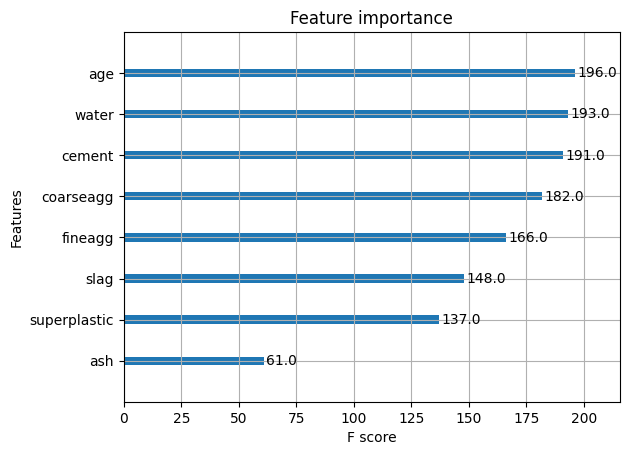

In [16]:
plot_importance(modeloxgb)